In [186]:
# import this libraryies just for practice, u dont need all of them
import numpy as np # used for handling numbers
import pandas as pd # used for handling the dataset
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns #data visualization library
from sklearn.model_selection import train_test_split # used for splitting training and testing data
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA
from sklearn.metrics import confusion_matrix
from sklearn.impute import SimpleImputer # used for handling missing data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # used for encoding categorical data
from sklearn.preprocessing import StandardScaler # used for feature scaling

In [187]:
data = pd.read_csv('C:/Users/PC/Downloads/StudentsPerformance.csv')

In [188]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [189]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [190]:
data.shape

(1000, 8)

In [191]:
# proveravamo da li ima nedostajucih vrednosti
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027C14A67DD8>,
      dtype=object)

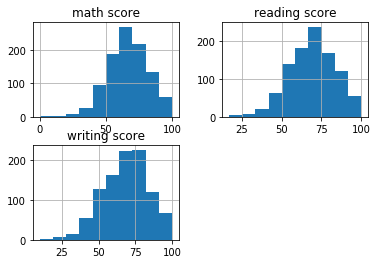

In [192]:
data.hist()

In [193]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    1000 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
math score                     1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [194]:
# prepoznavanje kategorickih varijabli
data['gender'].value_counts(normalize = True) * 100

female    51.8
male      48.2
Name: gender, dtype: float64

In [195]:
data['race/ethnicity'].value_counts(normalize = True) * 100

group C    31.9
group D    26.2
group B    19.0
group E    14.0
group A     8.9
Name: race/ethnicity, dtype: float64

In [196]:
data['parental level of education'].value_counts(normalize = True) * 100

some college          22.6
associate's degree    22.2
high school           19.6
some high school      17.9
bachelor's degree     11.8
master's degree        5.9
Name: parental level of education, dtype: float64

In [197]:
data['lunch'].value_counts(normalize = True) * 100

standard        64.5
free/reduced    35.5
Name: lunch, dtype: float64

In [198]:
data['test preparation course'].value_counts(normalize = True) * 100

none         64.2
completed    35.8
Name: test preparation course, dtype: float64

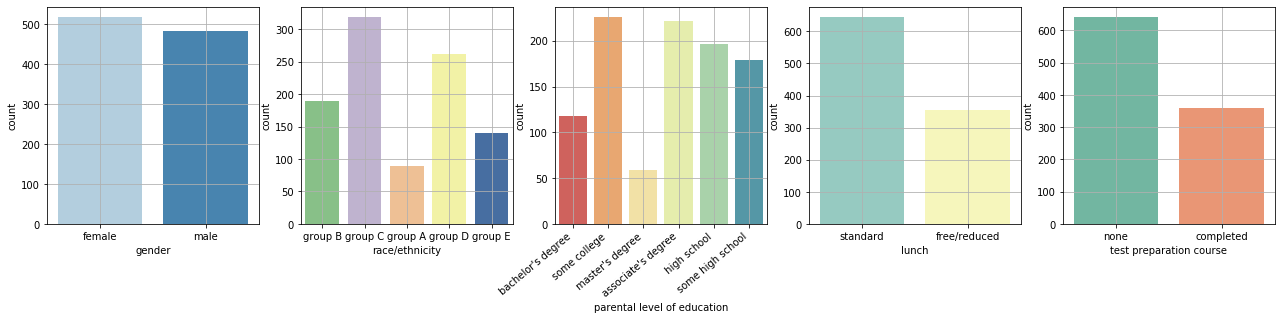

In [199]:
plt.figure(figsize=(22,4))

plt.subplot(1,5,1)
sns.countplot(data['gender'], palette = 'Blues')
plt.grid()

plt.subplot(1,5,2)
sns.countplot(data['race/ethnicity'], palette = 'Accent')
plt.grid()

plt.subplot(1,5,3)
ax = sns.countplot(data['parental level of education'], palette = 'Spectral')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid()

plt.subplot(1,5,4)
sns.countplot(data['lunch'], palette = 'Set3')
plt.grid()

plt.subplot(1,5,5)
sns.countplot(data['test preparation course'], palette = 'Set2')
plt.grid()

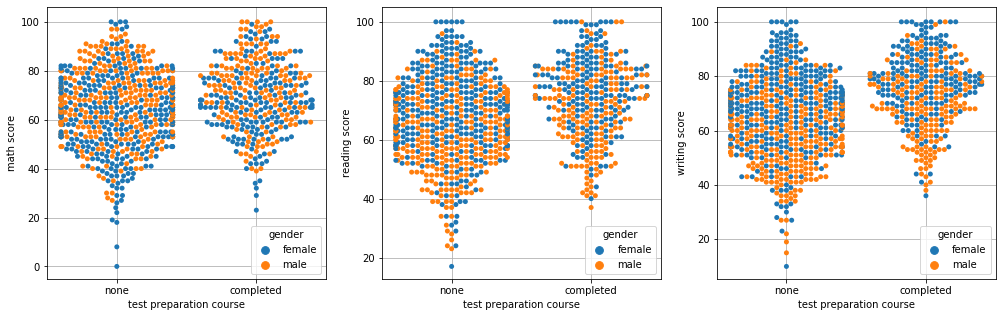

In [200]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.swarmplot(x = 'test preparation course', y = 'math score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.swarmplot(x = 'test preparation course', y = 'reading score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.swarmplot(x = 'test preparation course', y = 'writing score', hue='gender', data = data)
plt.grid()

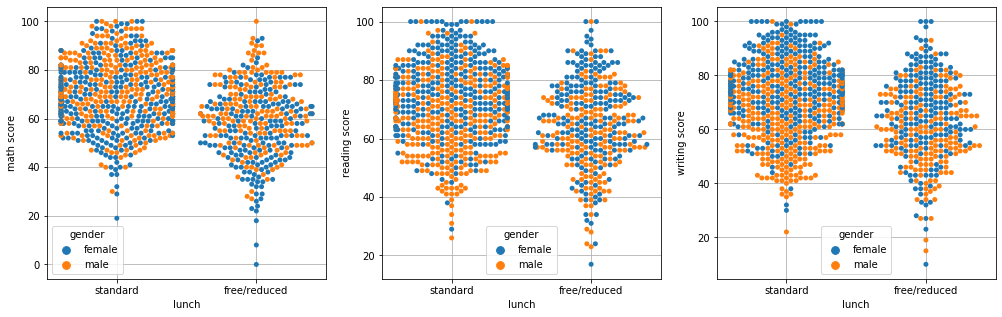

In [201]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.swarmplot(x = 'lunch', y = 'math score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.swarmplot(x = 'lunch', y = 'reading score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.swarmplot(x = 'lunch', y = 'writing score', hue='gender', data = data)
plt.grid()

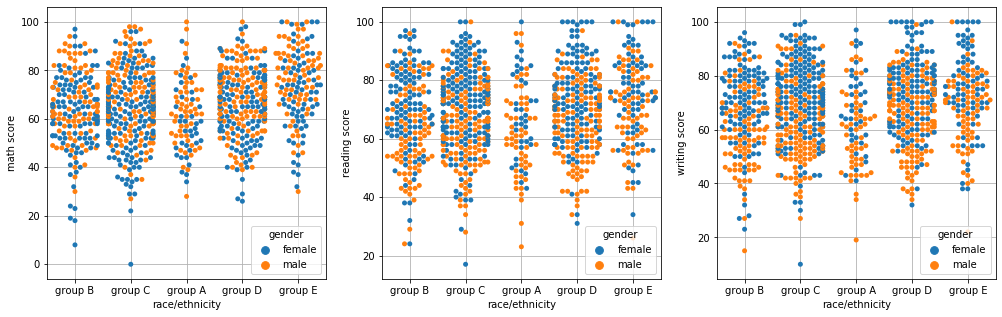

In [202]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
sns.swarmplot(x = 'race/ethnicity', y = 'math score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.swarmplot(x = 'race/ethnicity', y = 'reading score', hue='gender', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.swarmplot(x = 'race/ethnicity', y = 'writing score', hue='gender', data = data)
plt.grid()

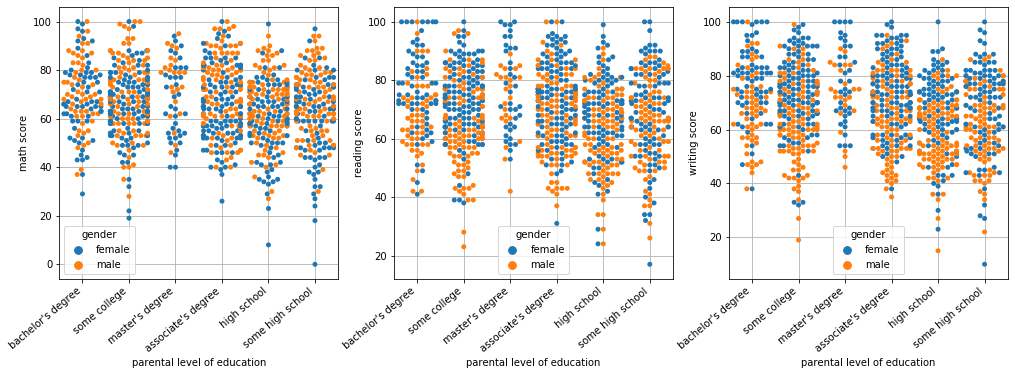

In [203]:
plt.figure(figsize=(17,5))

plt.subplot(1,3,1)
ax = sns.swarmplot(x = 'parental level of education', y = 'math score', hue='gender', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid()

plt.subplot(1,3,2)
ax = sns.swarmplot(x = 'parental level of education', y = 'reading score', hue='gender', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid()

plt.subplot(1,3,3)
ax = sns.swarmplot(x = 'parental level of education', y = 'writing score', hue='gender', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.grid()

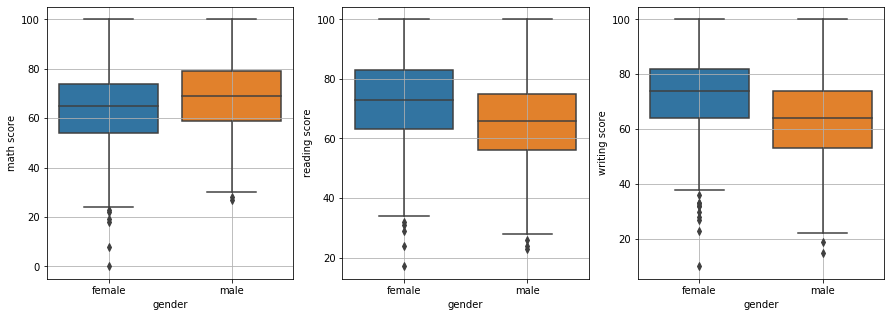

In [204]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'gender', y = 'math score', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.boxplot(x = 'gender', y = 'reading score', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x = 'gender', y = 'writing score', data = data)
plt.grid()

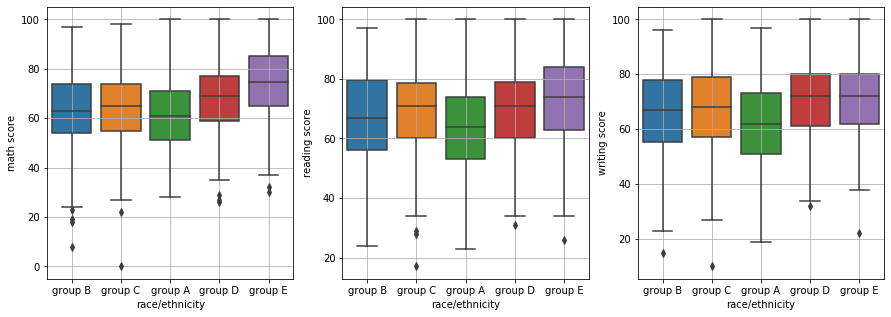

In [210]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'race/ethnicity', y = 'math score', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.boxplot(x = 'race/ethnicity', y = 'reading score', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.boxplot(x = 'race/ethnicity', y = 'writing score', data = data)
plt.grid()


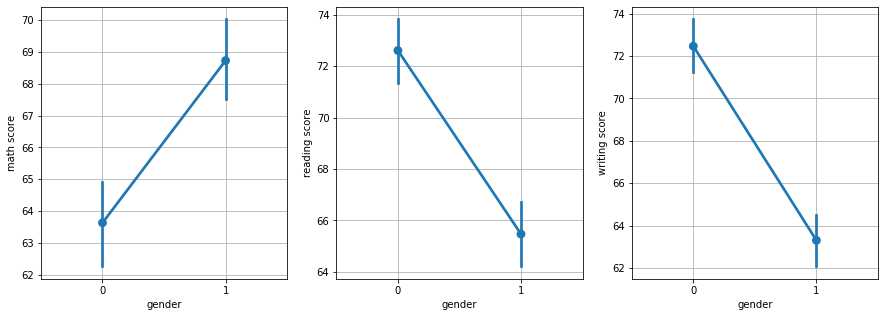

In [180]:

plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.pointplot(x = 'gender', y = 'math score', data = data)
plt.grid()

plt.subplot(1,3,2)
sns.pointplot(x = 'gender', y = 'reading score', data = data)
plt.grid()

plt.subplot(1,3,3)
sns.pointplot(x = 'gender', y = 'writing score', data = data)
plt.grid()

In [181]:
# Transformacija kategorickih varijabli
enc = LabelEncoder()
data['gender'] = enc.fit_transform(data['gender'])

enc = LabelEncoder()
data['race/ethnicity'] = data['race/ethnicity'].replace('group A', 1)
data['race/ethnicity'] = data['race/ethnicity'].replace('group B', 2)
data['race/ethnicity'] = data['race/ethnicity'].replace('group C', 3)
data['race/ethnicity'] = data['race/ethnicity'].replace('group D', 4)
data['race/ethnicity'] = data['race/ethnicity'].replace('group E', 5)

enc = LabelEncoder()
data['parental level of education'] = data['parental level of education'].replace('some college', 1)
data['parental level of education'] = data['parental level of education'].replace("associate's degree", 2)
data['parental level of education'] = data['parental level of education'].replace('high school', 3)
data['parental level of education'] = data['parental level of education'].replace('some high school', 4)
data['parental level of education'] = data['parental level of education'].replace("bachelor's degree", 5)
data['parental level of education'] = data['parental level of education'].replace("master's degree", 6)

enc = LabelEncoder()
data['lunch'] = enc.fit_transform(data['lunch'])


data['test preparation course'] = data['test preparation course'].replace('none', 0)
data['test preparation course'] = data['test preparation course'].replace('completed', 1)


In [182]:
# dodavanje kolone total score
passmarks = 51
data['total score'] = np.where((data['math score'] + data['reading score'] + data['writing score'])/3 < passmarks, 'Fail', 'Pass')

Pass    880
Fail    120
Name: total score, dtype: int64


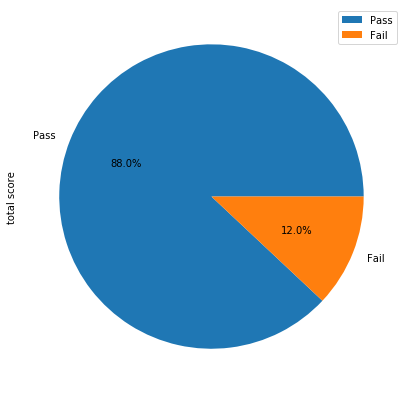

In [183]:
print(data['total score'].value_counts())
plt.figure(figsize = (7,7))
data['total score'].value_counts().plot(kind = 'pie', autopct="%1.1f%%")
plt.legend()

In [184]:
# transformacija kategoricke varijable total score u numericku
data['total score'] = data['total score'].replace('Fail', 0)
data['total score'] = data['total score'].replace('Pass', 1)

In [55]:
data.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score
0,0,2,5,1,0,72,72,74,1
1,0,3,1,1,1,69,90,88,1
2,0,2,6,1,0,90,95,93,1
3,1,1,2,0,0,47,57,44,0
4,1,3,1,1,0,76,78,75,1
5,0,2,2,1,0,71,83,78,1
6,0,2,1,1,1,88,95,92,1
7,1,2,1,0,0,40,43,39,0
8,1,4,3,0,1,64,64,67,1
9,0,2,3,0,0,38,60,50,0


In [56]:
X = data.iloc[:, :5]
X.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course
0,0,2,5,1,0
1,0,3,1,1,1
2,0,2,6,1,0
3,1,1,2,0,0
4,1,3,1,1,0
5,0,2,2,1,0
6,0,2,1,1,1
7,1,2,1,0,0
8,1,4,3,0,1
9,0,2,3,0,0


In [57]:
print(X.shape)

(1000, 5)


In [58]:
y = data.iloc[:, 8]
y.head(10)

0    1
1    1
2    1
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name: total score, dtype: int64

In [59]:
print(y.shape)

(1000,)


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\PC\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [61]:
model.score(X_train, y_train)

0.895

In [62]:
model.score(X_test, y_test)

0.845

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [64]:
model.score(X_train, y_train)

0.89125

In [65]:
model.score(X_test, y_test)

0.8